In [1]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
!pip install yfinance

You should consider upgrading via the 'c:\users\sherice\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

Matplotlib is building the font cache; this may take a moment.


In [4]:
name = 'VFIAX'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-12-22",end="2020-12-22")
x = df['Close']


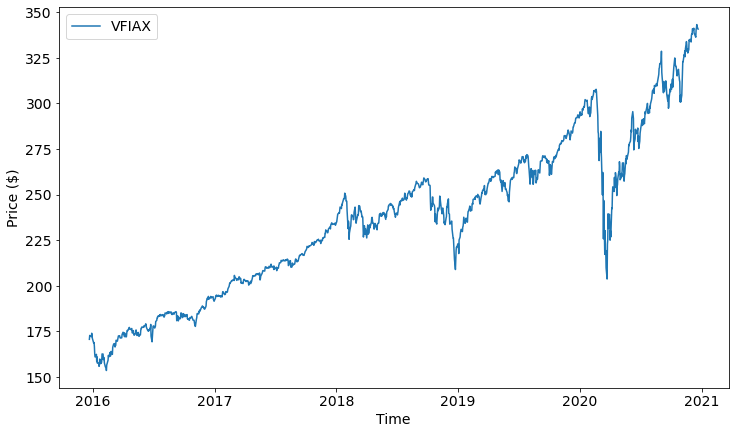

In [5]:
plt.plot(x,label="VFIAX")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [6]:
returns = x.pct_change(1).dropna()

In [7]:
returns[0:10]

Date
2015-12-23    0.012503
2015-12-24   -0.001577
2015-12-28   -0.002210
2015-12-29    0.010866
2015-12-30   -0.007149
2015-12-31   -0.009408
2016-01-04   -0.015068
2016-01-05    0.001993
2016-01-06   -0.012741
2016-01-07   -0.023688
Name: Close, dtype: float64

In [8]:
(x[1]-x[0])/x[0]

0.012503291634525526

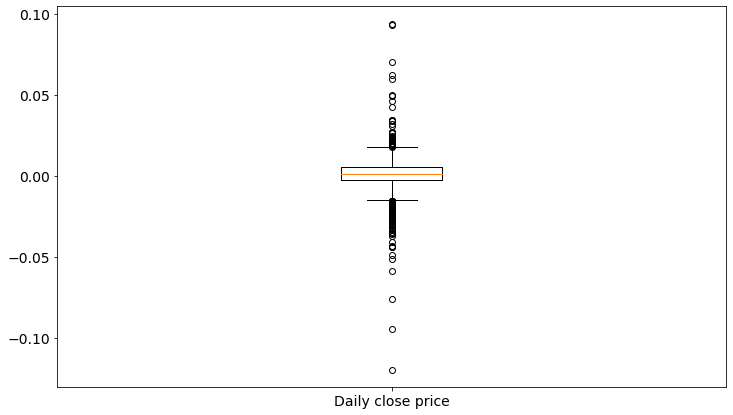

In [9]:
plt.boxplot(returns,labels=["Daily close price"])


plt.show()

In [10]:
returns.describe()

count    1258.000000
mean        0.000624
std         0.012130
min        -0.119766
25%        -0.002878
50%         0.000775
75%         0.005410
max         0.093983
Name: Close, dtype: float64

In [11]:
np.mean(returns)

0.000624271438804366

In [12]:
np.std(returns)

0.012125137825088773

In [13]:
np.quantile(returns,0.5)

0.0007750217462083597

In [14]:
skew(returns)

-0.7223495985132673

In [15]:
skewtest(returns)

SkewtestResult(statistic=-9.49761987589704, pvalue=2.147422922360427e-21)

In [16]:
kurtosis(returns)

20.345277728745273

In [17]:
kurtosistest(returns)

KurtosistestResult(statistic=18.046876565196975, pvalue=8.348014634720489e-73)

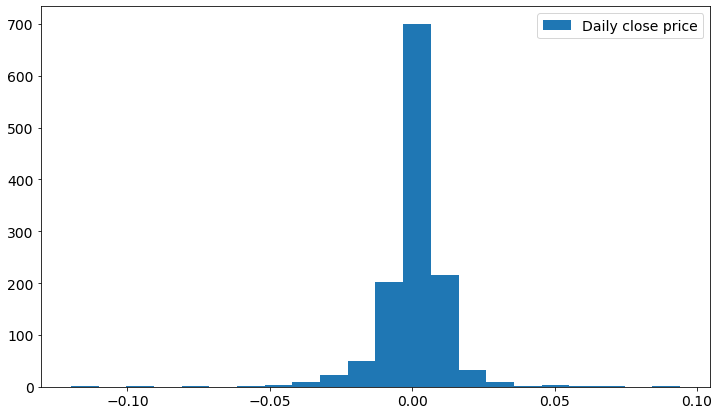

In [18]:
plt.hist(returns,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [19]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

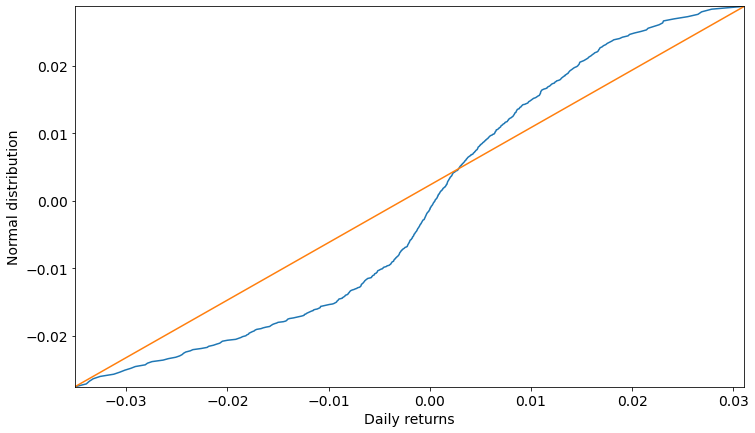

In [20]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

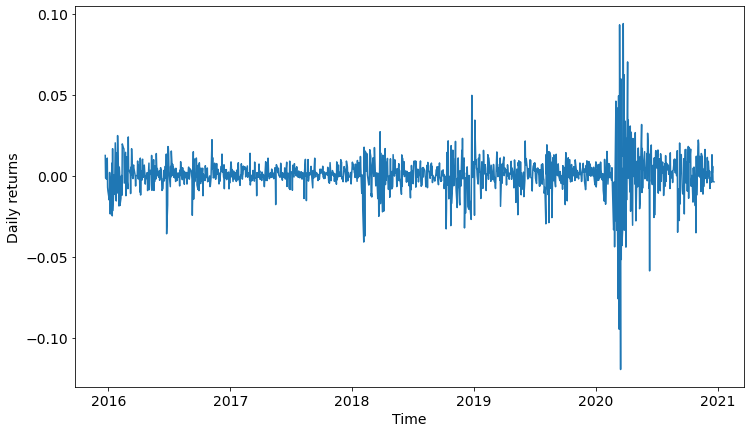

In [21]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

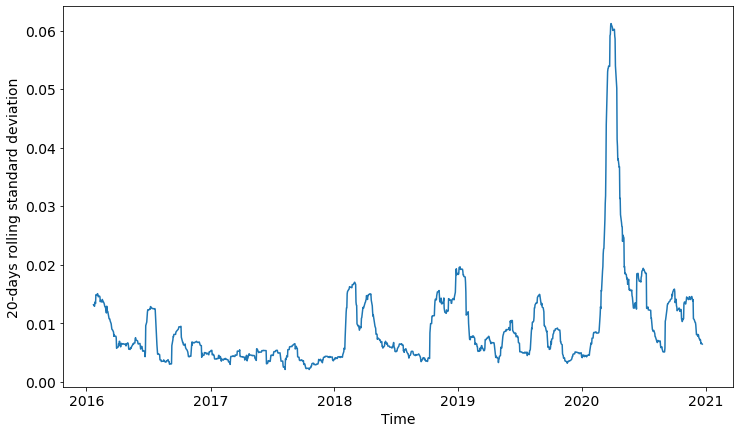

In [22]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

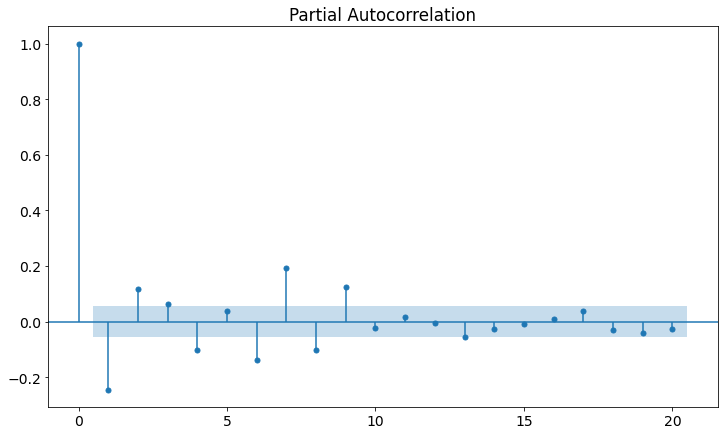

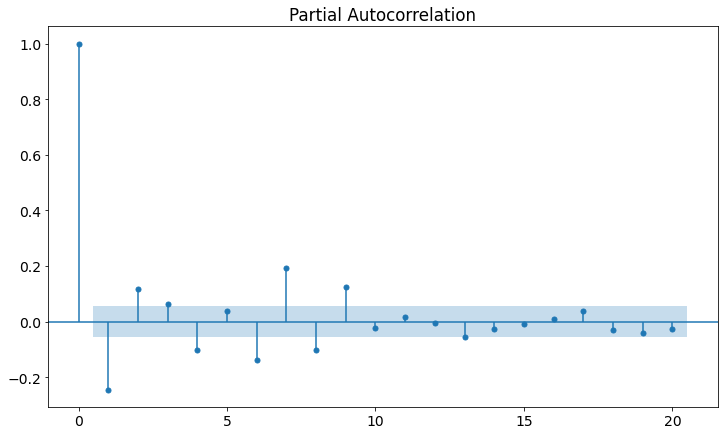

In [23]:
plot_pacf(returns,lags=20)